# IML Major HW1
| Name | ID |
|------|----|
| Daniel Gershkovich   | 209088723  |
| Assaf Alon   | 207376807  |

## Part 1

In [1]:
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

params = {
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "axes.titlesize": 22,
    "axes.labelsize": 20,
    "legend.fontsize": 18,
    "legend.title_fontsize": 22,
    "figure.titlesize": 24,
}
pylab.rcParams.update(params)

ASSAF_ID = 207376807
DANIEL_ID = 209088723

### Q1

In [2]:
# Q1
data_frame = pd.read_csv("virus_data.csv")
print(data_frame)

      patient_id  age sex  weight blood_type            current_location  \
0           1903   32   F    70.8         O+   ('19.04222', '-98.11889')   
1           1166   47   M    74.3         A+    ('51.62907', '-0.74934')   
2           1963   36   M    91.5         O+    ('39.12074', '27.18052')   
3            856   38   M    74.4         O+     ('40.1675', '34.37389')   
4           1808   23   F    59.7         A+           ('48.25', '16.4')   
...          ...  ...  ..     ...        ...                         ...   
1245         588    9   M    27.7         O+       ('4.2475', '9.00472')   
1246        1494   56   M    74.2         O+  ('47.80527', '-122.24064')   
1247        1824   30   M    78.6         O+  ('37.73604', '-120.93549')   
1248         493   33   M    75.8         A+    ('55.67938', '12.53463')   
1249         733   14   M    45.3         O+   ('30.16688', '-96.39774')   

      num_of_siblings  happiness_score  household_income  \
0                   3      

### Q2

In [ ]:
# Q2
print(data_frame["conversations_per_day"].value_counts().sort_index())

### Q3

In [ ]:
# Q3
pprint(list(data_frame.keys()))
pprint(data_frame["happiness_score"].value_counts())
pprint(data_frame["household_income"].value_counts())
pprint(data_frame["sport_activity"].value_counts())

In [4]:
# Q4
randomness = ASSAF_ID % 100 + DANIEL_ID % 100
X = data_frame.drop("spread", axis=1)
Y = data_frame["spread"]
train_set, test_set, train_labels, test_labels = train_test_split(
    X, Y, random_state=randomness, test_size=0.2
)
full_train_set, full_test_set = train_test_split(data_frame, random_state=randomness, test_size=0.2)

## Part 2

### Q5 / Task A

In [ ]:
# Q5 / Task A
plot = sns.pairplot(
    full_train_set, vars=["PCR_01", "PCR_03"], hue="spread", plot_kws={"s": 16}, palette=["#90EE90", "#8B0000"]
)
for ax in np.ravel(plot.axes):
    ax.grid(alpha=0.5)
plot.fig.set_size_inches(12, 8)
# plt.tight_layout()
plot.fig.suptitle("Correlation between PCR_01 and PCR_03", y=1.01)
plt.savefig("img.png", bbox_inches="tight")

### Q6

In [ ]:
# Q6
corr_01_spr = data_frame[["PCR_01", "PCR_03", "spread"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_01_spr, annot=True, cmap="coolwarm", annot_kws={"size": 36})
plt.title("Correlation matrix of features")
plt.savefig("img.png")
plt.show()
print(corr_01_spr)

### Q7 / Task B

In [67]:
# Q7 / Task B
from sklearn.base import BaseEstimator, ClassifierMixin

# Tip: Read about scipy...cdist, np.copy, and np.argsort (or better: np.argpartition)
# Avoid using for loops, list, map, lambda, etc


class kNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors: int = 3):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X = X
        self.y = y.to_numpy()
        return self

    def predict(self, X):
        distances = cdist(X, self.X)
        distance_idx = np.argpartition(distances, self.n_neighbors, -1)[:, :self.n_neighbors]
        return np.sign(np.sum(self.y[distance_idx], axis=-1))




### Q8 / Task C

In [ ]:
# Q8 / Task C

train_set, test_set, train_labels, test_labels = train_test_split(
    data_frame[["PCR_01", "PCR_03"]],
    data_frame["spread"],
    random_state=randomness,
    test_size=0.2,
)
# print(len(train_set), len(test_set))
knn = kNN(n_neighbors=1)
knn.fit(train_set, train_labels)
predictions = knn.predict(test_set)


import visualize_clf

visualize_clf.visualize_clf(knn, test_set, test_labels, "1-NN Classifier", "PCR_01", "PCR_03")
train_score = knn.score(train_set, train_labels)
test_score = knn.score(test_set, test_labels)
print(f"train score: {train_score}, test score: {test_score}")


### Q9

In [ ]:
# Q9

test_set = MinMaxScaler((-1, 1)).fit_transform(test_set)
train_set = MinMaxScaler((-1, 1)).fit_transform(train_set)

knn = kNN(n_neighbors=1)
knn.fit(train_set, train_labels)
visualize_clf.visualize_clf(knn, test_set, test_labels, "Normalized spread 1-NN classifier", "PCR_01", "PCR_03")
train_score = knn.score(train_set, train_labels)
test_score = knn.score(test_set, test_labels)
print(f"train score: {train_score}, test score: {test_score}")


### Q10

In [ ]:
# Q10

knn = kNN(n_neighbors=5)
knn.fit(train_set, train_labels)
visualize_clf.visualize_clf(knn, test_set, test_labels, "Normalized spread 5-NN classifier", "PCR_01", "PCR_03")
train_score = knn.score(train_set, train_labels)
test_score = knn.score(test_set, test_labels)
print(f"train score: {train_score}, test score: {test_score}")


### Q11

In [ ]:
# Q11

samples_x = np.random.chisquare(df=2, size=10000)
samples_y = np.random.uniform(2, 5, size=10000)
samples = np.column_stack((samples_x, samples_y))
scaler = MinMaxScaler((-1,1)).fit(samples)
print(scaler.transform(((1, 3), (5, 3))))
normalized_samples = MinMaxScaler((-1,1)).fit_transform(samples)
df = pd.DataFrame(samples, columns=["x","y"])
df_1 = pd.DataFrame(normalized_samples, columns=["x", 'y'])
sns.scatterplot(data=df, x='x', y="y", color='red', label='regular')
sns.scatterplot(data=df_1, x='x', y='y', color='blue', label='normalized')
plt.grid(True)
plt.xlabel('chi-square distributed feature')
plt.ylabel('uniform distributed feature')
plt.xlim(-2, 20)
plt.show()


## Part 3

### Q13 / Task D

In [5]:
# Task D
train_data_1 = full_train_set.copy()
train_data_1["SpecialProperty"] = train_data_1["blood_type"].isin(("O+", "B+"))  # Pascal case replaces snake case :(
train_data_1 = train_data_1.drop("blood_type", axis=1)

In [6]:
# Q13

# Extracting possible symptoms and adding them as Boolean values
possible_symptoms = train_data_1["symptoms"].unique()
possible_symptoms = set(symptom for combination in possible_symptoms if isinstance(combination, str) for symptom in combination.split(';'))
for symptom in possible_symptoms:
    train_data_1[symptom] = train_data_1["symptoms"].apply(lambda symptoms_str: int(symptom in symptoms_str) if isinstance(symptoms_str, str) else 0)
train_data_1 = train_data_1.drop("symptoms", axis=1)


### Task E

In [7]:
# Task E
import ast


def date_to_int(date: str):
    """
    Converts a date in the format of `dd-MM-yy` to an integer.
    Accuracy is compromised for easier code (Not accounting for different number of days in month)
    """
    splitted_date = [int(n) for n in date.split("-")]
    return 375 * splitted_date[2] + 31 * splitted_date[1] + splitted_date[0]

train_data_1["current_location_x"] = train_data_1["current_location"].apply(lambda location: ast.literal_eval(location)[0])
train_data_1["current_location_y"] = train_data_1["current_location"].apply(lambda location: ast.literal_eval(location)[1])
train_data_1["is_special_blood"] = train_data_1["SpecialProperty"].apply(lambda is_special: int(is_special))
train_data_1["is_male"] = train_data_1["sex"].apply(lambda sex: int(sex == "M"))
train_data_1["pcr_date"] = train_data_1["pcr_date"].apply(date_to_int)

train_data_1 = train_data_1.drop(["patient_id", "current_location", "sex", "SpecialProperty"], axis=1)

### Q14 / Q15

In [ ]:
# Q14, Q15
def generate_graphs(df, col_name):
    # COL_NAME = ['PCR_01', 'num_of_siblings']
    COLS, ROWS = (2, len(col_name))
    plt.figure(figsize=(5 * COLS, 4 * ROWS))
    for row in range(ROWS):
        column = col_name[row]
        for j, cls in enumerate(["risk", "spread"]):
            plt.subplot(ROWS,COLS, row * COLS + 1 + j)
            isContinuous = "float" in df[column].dtype.name
            sns.histplot(data=df, x=column, hue=cls, palette=["#90EE90", "#8B0000"], line_kws={"linewidth": 3},
            kde=isContinuous, multiple="layer" if isContinuous else "dodge")
            # sums = df[cls].groupby(column).sum().reset_index()
            plt.grid(alpha=0.5)
    plt.tight_layout()


for i in train_data_1.columns:
    generate_graphs(train_data_1, [i])
    plt.savefig(f"{i}.png")
    plt.show()


### Q16

In [ ]:
# Q16
def pairplot(df: pd.DataFrame, prediction="risk"):
    plot = sns.pairplot(df[df.filter(like='PCR').columns.tolist() + [prediction]], plot_kws={"s": 15}, hue=prediction, palette=["#90EE90", "#8B0000"])
    for ax in plot.axes.flatten():
        ax.grid(True)
    plot.figure.set_size_inches(15,10)
    # plot.legend.
    plt.legend(loc="upper right", frameon=True, fontsize=15, markerscale=50)
    plt.show()

# Prints the entire matrix
# pairplot(train_data_1)

plt.grid(True)
pairplot(train_data_1[train_data_1['is_special_blood'] == True][["PCR_02", "PCR_06", "risk"]])
pairplot(train_data_1[train_data_1['is_special_blood'] == False][["PCR_02", "PCR_06", "risk"]])
    
    


### Q17

In [ ]:
# Q17
# plot = sns.jointplot(data=train_data_1[train_data_1["is_special_blood"] == False], x="PCR_02", y="PCR_06", hue="risk", palette=["#90EE90", "#8B0000"])
plot = sns.jointplot(data=train_data_1[train_data_1["is_special_blood"] == True], x="PCR_02", y="PCR_06", hue="risk", palette=["#90EE90", "#8B0000"])
# plot = sns.jointplot(data=train_data_1, x="PCR_02", y="PCR_06", hue="risk", palette=["#90EE90", "#8B0000"])
plt.grid(True)
plot.figure.suptitle("PCR_06 vs PCR_02, has blood")
plt.show()

### Q18

In [ ]:
def plot3d(df, colX, colY, colZ, title, hue=None, s=1):
  %matplotlib inline

  fig = plt.figure(figsize=(20, 4))
  axes = [fig.add_subplot(1, 4, 1, projection='3d'),
          fig.add_subplot(1, 4, 2, projection='3d'),
          fig.add_subplot(1, 4, 3, projection='3d'),
          fig.add_subplot(1, 4, 4, projection='3d')]

  palette = sns.color_palette("hls", 2)

  for i,ax in enumerate(axes):
    if hue is None:
      ax.scatter3D(df[colX], df[colY], df[colZ], color=palette[0], s=s)
    else:
      idx = df[hue] == True
      df1 = df[idx]
      df2 = df[~idx]

      ax.scatter3D(df1[colX], df1[colY], df1[colZ], color=palette[0], s=s)
      ax.scatter3D(df2[colX], df2[colY], df2[colZ], color=palette[1], s=s)

    if i == 3 or i == 1:
      ax.set_xlabel(colX, labelpad=20)
      ax.set_ylabel(colY, labelpad=20)
    else:
      ax.xaxis.set_ticklabels([])
      ax.yaxis.set_ticklabels([])

    ax.view_init(elev=5., azim=45*i+15)

  axes[1].set_zlabel("\n" + colZ, labelpad=1)

  plt.suptitle(title)
  plt.subplots_adjust(wspace=0.1, top=0.99)
  plt.show()

In [ ]:
# Q18
plot3d(train_data_1, "PCR_02", "is_special_blood", "PCR_06", title="Comparing PCR_02 and PCR_06 with relation to special blood", hue="risk", s=5) 


## Q22 / Task F

In [56]:
from sklearn.preprocessing import StandardScaler
normalized_data = train_data_1.copy()
labels = list(normalized_data.columns)
labels.remove('spread')
labels.remove('risk')
from scipy.stats import shapiro
scaler_decision = dict()
for label in labels:
    stat, p = shapiro(normalized_data[[label]])
    if p < 0.05:
        print(f"<> label {label} is not normally distribured, p-value = {p}, stat = {stat}")
        num_unique = normalized_data[label].nunique()
        if num_unique > 2 and num_unique < 30:
            normalized_data[[label]] = StandardScaler().fit_transform(normalized_data[[label]])
            scaler_decision[label] = 'standard'
        else:
            normalized_data[[label]] = MinMaxScaler((-1, 1)).fit_transform(normalized_data[[label]])
            scaler_decision[label] = 'minmax'
    else:
        print(f"<++> label {label} is normally distribured!, p-value = {p}, stat = {stat}")
        normalized_data[[label]] = StandardScaler().fit_transform(normalized_data[[label]])
        scaler_decision[label] = 'standard'


print(scaler_decision)

<> label age is not normally distribured, p-value = 4.265696823802705e-14, stat = 0.9677310633735379
<> label weight is not normally distribured, p-value = 2.074816823085137e-06, stat = 0.9898245835330154
<> label num_of_siblings is not normally distribured, p-value = 5.229080805005748e-24, stat = 0.9087082195088065
<> label happiness_score is not normally distribured, p-value = 5.318039128589055e-23, stat = 0.9168547489519551
<> label household_income is not normally distribured, p-value = 3.1117626824038317e-25, stat = 0.8979978503469536
<> label conversations_per_day is not normally distribured, p-value = 1.170264031580729e-26, stat = 0.8843663571072649
<++> label sugar_levels is normally distribured!, p-value = 0.5148450745748832, stat = 0.9984380861325534
<> label sport_activity is not normally distribured, p-value = 9.689875569405641e-30, stat = 0.8500751515818066
<> label pcr_date is not normally distribured, p-value = 9.393374175560125e-18, stat = 0.950905546167004
<> label PCR

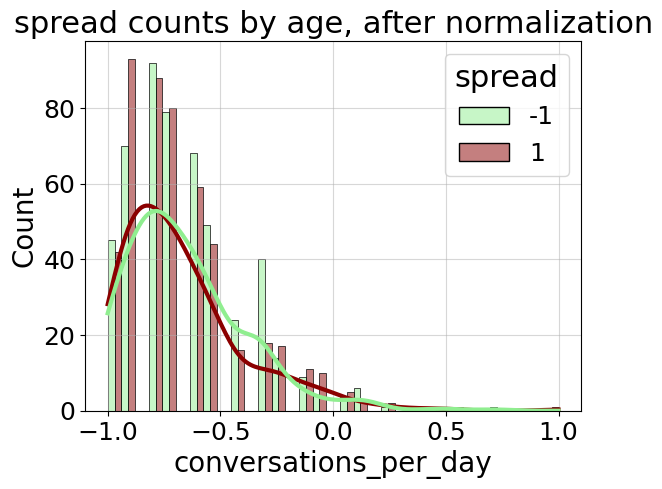

In [55]:


sns.histplot(data=normalized_data, x='conversations_per_day', hue='spread', palette=["#90EE90", "#8B0000"], line_kws={"linewidth": 3},
            kde=True, multiple="dodge")
plt.grid(alpha=0.5)
plt.title("spread counts by age, after normalization")
plt.show()

In [72]:

def date_to_int(date: str):
    """
    Converts a date in the format of `dd-MM-yy` to an integer.
    Accuracy is compromised for easier code (Not accounting for different number of days in month)
    """
    splitted_date = [int(n) for n in date.split("-")]
    return 375 * splitted_date[2] + 31 * splitted_date[1] + splitted_date[0]


def transform_features(new_data):
    transformed_data = new_data.copy()
    transformed_data["SpecialProperty"] = transformed_data["blood_type"].isin(("O+", "B+"))  # Pascal case replaces snake case :(
    transformed_data = transformed_data.drop("blood_type", axis=1)

    # Extracting possible symptoms and adding them as Boolean values
    possible_symptoms = transformed_data["symptoms"].unique()
    possible_symptoms = set(symptom for combination in possible_symptoms if isinstance(combination, str) for symptom in combination.split(';'))
    for symptom in possible_symptoms:
        transformed_data[symptom] = transformed_data["symptoms"].apply(lambda symptoms_str: int(symptom in symptoms_str) if isinstance(symptoms_str, str) else 0)
    transformed_data = transformed_data.drop("symptoms", axis=1)
    transformed_data["current_location_x"] = transformed_data["current_location"].apply(lambda location: ast.literal_eval(location)[0])
    transformed_data["current_location_y"] = transformed_data["current_location"].apply(lambda location: ast.literal_eval(location)[1])
    transformed_data["is_special_blood"] = transformed_data["SpecialProperty"].apply(lambda is_special: int(is_special))
    transformed_data["is_male"] = transformed_data["sex"].apply(lambda sex: int(sex == "M"))
    transformed_data["pcr_date"] = transformed_data["pcr_date"].apply(date_to_int)
    transformed_data = transformed_data.drop(["patient_id", "current_location", "sex", "SpecialProperty"], axis=1)
    return transformed_data

def prepare_data(training_data, new_data):
    normalized_data = new_data.copy()
    normalized_data = transform_features(normalized_data)
    training_data = transform_features(training_data)
    print(list(normalized_data.columns))
    labels = list(normalized_data.columns)
    labels.remove('spread')
    labels.remove('risk')
    scaler_decision = dict()
    for label in labels:
        stat, p = shapiro(normalized_data[[label]])
        if p < 0.05:
            print(f"<> label {label} is not normally distribured, p-value = {p}, stat = {stat}")
            num_unique = normalized_data[label].nunique()
            if num_unique > 2 and num_unique < 30:
                normalized_data[[label]] = StandardScaler().fit(training_data[[label]]).transform(normalized_data[[label]])
                scaler_decision[label] = 'standard'
            else:
                normalized_data[[label]] = MinMaxScaler((-1, 1)).fit(training_data[[label]]).transform(normalized_data[[label]])
                scaler_decision[label] = 'minmax'
        else:
            print(f"<++> label {label} is normally distribured!, p-value = {p}, stat = {stat}")
            normalized_data[[label]] = StandardScaler().fit(training_data[[label]]).transform(normalized_data[[label]])
            scaler_decision[label] = 'standard'
    return normalized_data

In [76]:
full_train_set, full_test_set = train_test_split(data_frame, random_state=randomness, test_size=0.2)
prepared_train_data = prepare_data(full_train_set, full_train_set)
prepared_train_data.to_csv("prepared_train_data.csv", index=False)
prepared_test_data = prepare_data(full_train_set, full_test_set)
prepared_test_data.to_csv("prepared_test_data.csv", index=False)


['age', 'weight', 'num_of_siblings', 'happiness_score', 'household_income', 'conversations_per_day', 'sugar_levels', 'sport_activity', 'pcr_date', 'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10', 'spread', 'risk', 'smell_loss', 'shortness_of_breath', 'sore_throat', 'fever', 'cough', 'current_location_x', 'current_location_y', 'is_special_blood', 'is_male']
<> label age is not normally distribured, p-value = 4.265696823802705e-14, stat = 0.9677310633735379
<> label weight is not normally distribured, p-value = 2.074816823085137e-06, stat = 0.9898245835330154
<> label num_of_siblings is not normally distribured, p-value = 5.229080805005748e-24, stat = 0.9087082195088065
<> label happiness_score is not normally distribured, p-value = 5.318039128589055e-23, stat = 0.9168547489519551
<> label household_income is not normally distribured, p-value = 3.1117626824038317e-25, stat = 0.8979978503469536
<> label conversations_per_day is not normal